In [132]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
#import koreanize_matplotlib as plt
import matplotlib.pyplot as plt

# plt.rcParams["font.family"] = "D2Coding"
# plt.rcParams["axes.unicode_minus"] = False
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 'NanumGothic'
plt.rcParams["axes.unicode_minus"] = False

In [112]:
cancer = load_breast_cancer()

In [116]:
housing = fetch_california_housing()
X_train, X_test , y_train, y_test = train_test_split(cancer.data, cancer.target)

In [80]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [81]:
X_train_scaled = scaler.transform(X_train)

In [82]:
cancer.data.shape, cancer.target.shape, np.unique(cancer.target)
unique, counts = np.unique(cancer.clear, return_counts=True)
for i, (val, count) in enumerate(zip(unique, counts)):
    print(f"{cancer.target_name[val]}: {count/len(cancer.target)}")

AttributeError: target_name

In [100]:

X_train, X_test , y_train, y_test = train_test_split(cancer.data,
                                                     cancer.target,
                                                     stratify=cancer.target,
                                                     random_state=42)

In [86]:
#StandardScaler 스케일러 저굥ㅇ
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
y_pread = knn.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred=y_pread))

0.9790209790209791


In [87]:
training_accuracy = []
test_accuracy = []
neighbors_setting = range(2,31)

In [88]:
for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)

    train_acc = knn.score(X_train_scaled, y_train)
    test_acc = knn.score(X_test_scaled, y_test)

    training_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

print(training_accuracy)
print(test_accuracy)

[0.9788732394366197, 0.9765258215962441, 0.9788732394366197, 0.9694835680751174, 0.9765258215962441, 0.9741784037558685, 0.9741784037558685, 0.9694835680751174, 0.971830985915493, 0.971830985915493, 0.9694835680751174, 0.971830985915493, 0.971830985915493, 0.9694835680751174, 0.9694835680751174, 0.9647887323943662, 0.9671361502347418, 0.9647887323943662, 0.9671361502347418, 0.9624413145539906, 0.9647887323943662, 0.9624413145539906, 0.9647887323943662, 0.9671361502347418, 0.9671361502347418, 0.9671361502347418, 0.960093896713615, 0.9624413145539906, 0.9624413145539906]
[0.9370629370629371, 0.972027972027972, 0.958041958041958, 0.9790209790209791, 0.972027972027972, 0.9790209790209791, 0.972027972027972, 0.965034965034965, 0.965034965034965, 0.972027972027972, 0.9790209790209791, 0.958041958041958, 0.965034965034965, 0.958041958041958, 0.958041958041958, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.9440559440559441, 0.9440559440559441, 0.951048951048951,

In [89]:
best_k = neighbors_setting[np.argmax(training_accuracy)]
best_test_accuracy =max(test_accuracy)
best_k, np.argmax(training_accuracy)

(2, 0)

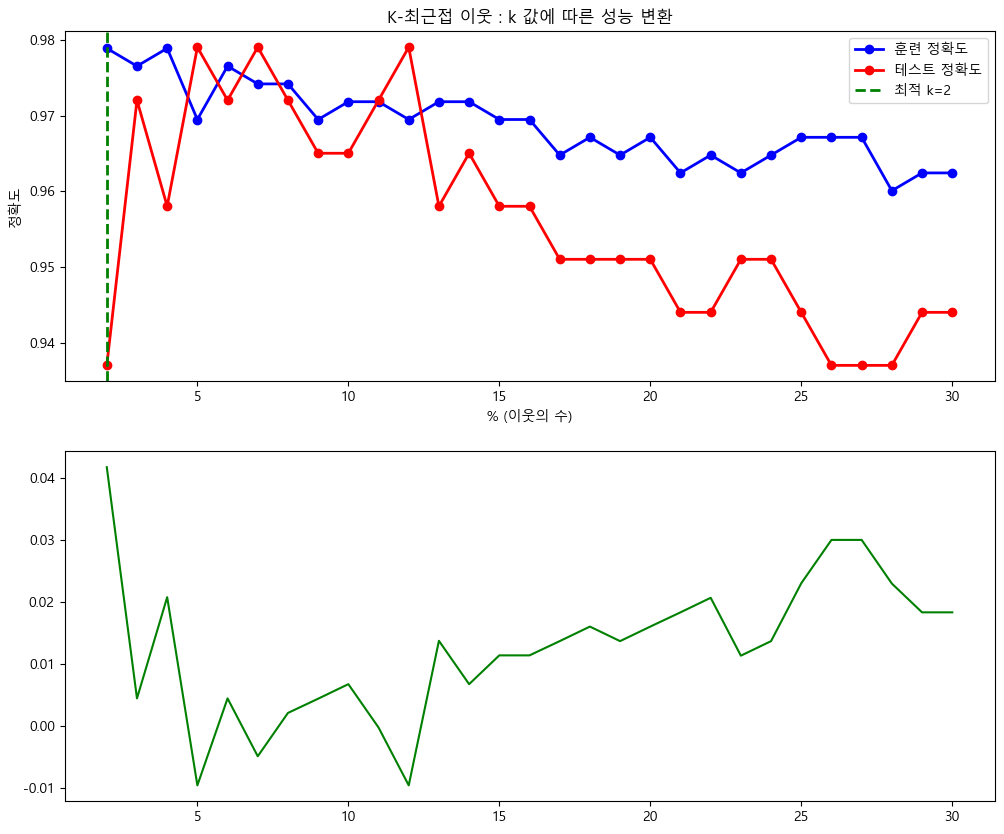

In [90]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10))

#정확도 곡선
ax1.plot(neighbors_setting,training_accuracy, "o-", label="훈련 정확도", linewidth=2, markersize=6, color="blue")
ax1.plot(neighbors_setting,test_accuracy, "o-", label="테스트 정확도", linewidth=2, markersize=6, color="red")
ax1.axvline(x=best_k, color="green", linestyle="--",linewidth=2, label=f"최적 k={best_k}")
ax1.set_ylabel("정확도")
ax1.set_xlabel("% (이웃의 수)")
ax1.set_title("K-최근접 이웃 : k 값에 따른 성능 변환")
ax1.legend()

#정확도 차이
accuracy_diff = np.array(training_accuracy) - np.array(test_accuracy)
ax2.plot(neighbors_setting,accuracy_diff,label="정확도 차이",color="green")

#나이브 베이즈를 사용해서 최적의 스케일러는?

In [134]:
scaler = {
    "None":None,
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "QuantileTransformer" : QuantileTransformer(output_distribution="normal")
}

In [135]:
scaling_results = {}
for name, scaler in scaler.items():
    if scaler is not None:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    svr = SVR()
    svr.fit(X_train_scaled,y_train)

    y_pread = svr.predict(X_test_scaled)
    mse = mean_squared_error(X_train,y_train)
    
    #accuracy = accuracy_score(y_test,y_pred=y_pread)

    #scaling_results = {"accuracy":accuracy,"X_test_scaled" : X_test_scaled}
    scaling_results = {"mse":mse}

ValueError: y_true and y_pred have different number of output (30!=1)

In [122]:
scaling_results['accuracy']

0.9790209790209791